# Load and Clean

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df1 = pd.read_csv("/content/drive/MyDrive/NFL Coach Hire 2013 - 2024.csv")

In [11]:
df2 = pd.read_csv("/content/drive/MyDrive/NFL Black Roles 2013-2024.csv")

In [12]:
df1.head()

,year,hc_name,race_ethnicity,minority,former_player,team,hc_round,prior_role,side,previous_interim,internal_promotion,hired_from_college,active,tenure_end_year,tenure_length,notes
0,2013,Andy Reid,White,0,0,Kansas City Chiefs,2,1,Offense,0,0,0,1,NaN,12,"Former HC, Eagles"
1,2013,Doug Marrone,White,0,0,Buffalo Bills,1,1,Offense,1,0,1,0,2020.0,8,Hired from Syracuse
2,2013,Marc Trestman,White,0,0,Chicago Bears,1,1,Offense,0,0,0,0,2014.0,2,"CFL hire, Montreal Alouettes"
3,2013,Rob Chudzinski,White,0,0,Cleveland Browns,1,1,Offense,0,0,0,0,2013.0,1,"OC, Panthers"
4,2013,Gus Bradley,White,0,0,Jacksonville Jaguars,1,1,Defense,0,0,0,0,2016.0,4,"DC, Seahawks"


In [13]:
df2.head()

,year,pct_black_players,pct_black_hcs_total,pct_black_assistants,pct_black_gms,pct_women_assistants,pct_woc_assistants,representation_gap_hc
0,2013,66.3%,9.0%,29%,19.0%,0.0%,0.0%,57.3%
1,2014,68.0%,12.5%,30%,24.1%,0.0%,0.0%,55.5%
2,2015,NaN,15.6%,35%,21.9%,0.0%,0.0%,NaN
3,2016,69.7%,15.6%,28%,15.6%,0.1%,0.0%,54.1%
4,2017,NaN,21.9%,28%,18.8%,0.1%,0.0%,NaN


In [14]:
role_df = df2.drop(['pct_women_assistants', 'pct_woc_assistants'], axis=1)
role_df.head()

,year,pct_black_players,pct_black_hcs_total,pct_black_assistants,pct_black_gms,representation_gap_hc
0,2013,66.3%,9.0%,29%,19.0%,57.3%
1,2014,68.0%,12.5%,30%,24.1%,55.5%
2,2015,NaN,15.6%,35%,21.9%,NaN
3,2016,69.7%,15.6%,28%,15.6%,54.1%
4,2017,NaN,21.9%,28%,18.8%,NaN


In [15]:
print(coach_df.isnull().sum())

print(role_df.isnull().sum())

year                   0
hc_name                0
race_ethnicity         0
minority               0
former_player          0
team                   0
hc_round               0
prior_role             0
side                   4
previous_interim       0
internal_promotion     0
hired_from_college     0
active                 0
tenure_end_year       19
tenure_length          0
notes                  0
dtype: int64
year                     0
pct_black_players        3
pct_black_hcs_total      2
pct_black_assistants     0
pct_black_gms            1
representation_gap_hc    5
dtype: int64


In [16]:
coach_df['side'] = coach_df['side'].replace(['none', 'None', '', 'NA'], pd.NA)

coach_df['side'] = coach_df['side'].fillna("No Coaching Role")

coach_df['tenure_end_year'] = pd.to_numeric(coach_df['tenure_end_year'], errors='coerce')

In [17]:
coach_df.head()

,year,hc_name,race_ethnicity,minority,former_player,team,hc_round,prior_role,side,previous_interim,internal_promotion,hired_from_college,active,tenure_end_year,tenure_length,notes
0,2013,Andy Reid,White,0,0,Kansas City Chiefs,2,1,Offense,0,0,0,1,NaN,12,"Former HC, Eagles"
1,2013,Doug Marrone,White,0,0,Buffalo Bills,1,1,Offense,1,0,1,0,2020.0,8,Hired from Syracuse
2,2013,Marc Trestman,White,0,0,Chicago Bears,1,1,Offense,0,0,0,0,2014.0,2,"CFL hire, Montreal Alouettes"
3,2013,Rob Chudzinski,White,0,0,Cleveland Browns,1,1,Offense,0,0,0,0,2013.0,1,"OC, Panthers"
4,2013,Gus Bradley,White,0,0,Jacksonville Jaguars,1,1,Defense,0,0,0,0,2016.0,4,"DC, Seahawks"


In [18]:
print(coach_df.isnull().sum())

year                   0
hc_name                0
race_ethnicity         0
minority               0
former_player          0
team                   0
hc_round               0
prior_role             0
side                   0
previous_interim       0
internal_promotion     0
hired_from_college     0
active                 0
tenure_end_year       19
tenure_length          0
notes                  0
dtype: int64


# Figure 2. Racial Composition Heatmap

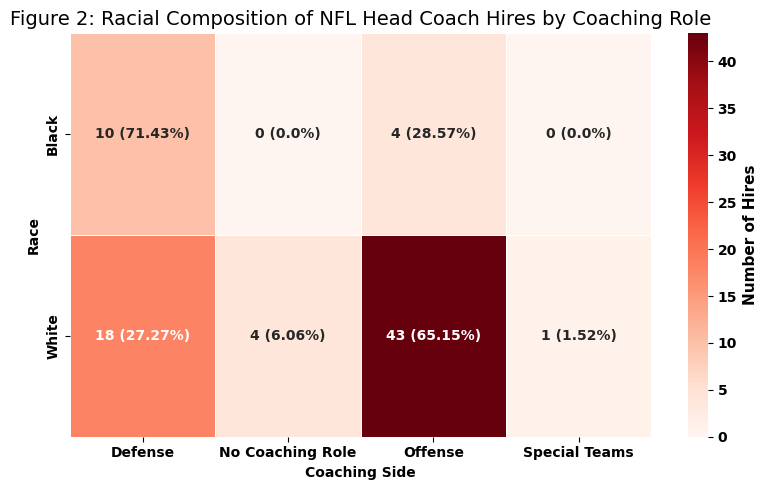

In [19]:
coach_df_hm = coach_df[coach_df['race_ethnicity'].isin(['Black', 'White'])].copy()

coach_df_hm['race_group'] = coach_df_hm['race_ethnicity']

coach_df_hm['side'] = coach_df_hm['side'].replace(['none', 'None'], 'No Coaching Role')
coach_df_hm['side'] = coach_df_hm['side'].fillna('No Coaching Role')

heatmap_bw_count = pd.crosstab(coach_df_hm['race_group'], coach_df_hm['side'])

heatmap_bw_percentage = heatmap_bw_count.div(heatmap_bw_count.sum(axis=1), axis=0) * 100

heatmap_combined = heatmap_bw_count.astype(str) + ' (' + heatmap_bw_percentage.round(2).astype(str) + '%)'

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_bw_count, annot=heatmap_combined, fmt='', cmap='Reds', linewidths=0.5, cbar_kws={'label': 'Number of Hires'}, annot_kws={'weight': 'bold'})
plt.title("Figure 2: Racial Composition of NFL Head Coach Hires by Coaching Role", fontsize=14)
plt.xlabel("Coaching Side", weight='bold')
plt.ylabel("Race", weight='bold')
plt.tight_layout()

plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')

cbar = plt.gcf().axes[-1]
cbar.set_ylabel("Number of Hires", fontsize=11, weight='bold')

for label in cbar.get_yticklabels():
    label.set_weight('bold')

plt.show()

# Machine Learning Prep

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

coach_df['rehire'] = coach_df['prior_role'].apply(lambda x: 0 if x == 1 else 1)

coach_df['race_black'] = (coach_df['race_ethnicity'] == 'Black').astype(int)

X = coach_df[['race_black', 'former_player', 'tenure_length']]
X = pd.concat([X, pd.get_dummies(coach_df['side'], prefix='side', drop_first=True)], axis=1)
y = coach_df['rehire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logisitic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logreg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg_balanced.fit(X_train, y_train)

y_pred_logreg_bal = logreg_balanced.predict(X_test)
logreg_bal_accuracy = accuracy_score(y_test, y_pred_logreg_bal)
logreg_bal_conf_matrix = confusion_matrix(y_test, y_pred_logreg_bal)
logreg_bal_class_report = classification_report(y_test, y_pred_logreg_bal, output_dict=True)

logreg_bal_accuracy, logreg_bal_conf_matrix, logreg_bal_class_report

(0.7058823529411765,
 array([[11,  2],
        [ 3,  1]]),
 {'0': {'precision': 0.7857142857142857,
   'recall': 0.8461538461538461,
   'f1-score': 0.8148148148148148,
   'support': 13.0},
  '1': {'precision': 0.3333333333333333,
   'recall': 0.25,
   'f1-score': 0.2857142857142857,
   'support': 4.0},
  'accuracy': 0.7058823529411765,
  'macro avg': {'precision': 0.5595238095238095,
   'recall': 0.5480769230769231,
   'f1-score': 0.5502645502645502,
   'support': 17.0},
  'weighted avg': {'precision': 0.6792717086834734,
   'recall': 0.7058823529411765,
   'f1-score': 0.6903205726735138,
   'support': 17.0}})

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_balanced.fit(X_train, y_train)

y_pred_tree_bal = tree_balanced.predict(X_test)
tree_bal_accuracy = accuracy_score(y_test, y_pred_tree_bal)
tree_bal_conf_matrix = confusion_matrix(y_test, y_pred_tree_bal)
tree_bal_class_report = classification_report(y_test, y_pred_tree_bal, output_dict=True)

tree_bal_accuracy, tree_bal_conf_matrix, tree_bal_class_report

(0.7647058823529411,
 array([[12,  1],
        [ 3,  1]]),
 {'0': {'precision': 0.8,
   'recall': 0.9230769230769231,
   'f1-score': 0.8571428571428571,
   'support': 13.0},
  '1': {'precision': 0.5,
   'recall': 0.25,
   'f1-score': 0.3333333333333333,
   'support': 4.0},
  'accuracy': 0.7647058823529411,
  'macro avg': {'precision': 0.65,
   'recall': 0.5865384615384616,
   'f1-score': 0.5952380952380952,
   'support': 17.0},
  'weighted avg': {'precision': 0.7294117647058824,
   'recall': 0.7647058823529411,
   'f1-score': 0.7338935574229692,
   'support': 17.0}})

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_balanced_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced_model.fit(X_train, y_train)

y_pred_rf_balanced = rf_balanced_model.predict(X_test)
rf_balanced_accuracy = accuracy_score(y_test, y_pred_rf_balanced)
rf_balanced_conf_matrix = confusion_matrix(y_test, y_pred_rf_balanced)
rf_balanced_class_report = classification_report(y_test, y_pred_rf_balanced, output_dict=True)

rf_balanced_accuracy, rf_balanced_conf_matrix, rf_balanced_class_report

(0.8235294117647058,
 array([[13,  0],
        [ 3,  1]]),
 {'0': {'precision': 0.8125,
   'recall': 1.0,
   'f1-score': 0.896551724137931,
   'support': 13.0},
  '1': {'precision': 1.0, 'recall': 0.25, 'f1-score': 0.4, 'support': 4.0},
  'accuracy': 0.8235294117647058,
  'macro avg': {'precision': 0.90625,
   'recall': 0.625,
   'f1-score': 0.6482758620689655,
   'support': 17.0},
  'weighted avg': {'precision': 0.8566176470588235,
   'recall': 0.8235294117647058,
   'f1-score': 0.7797160243407708,
   'support': 17.0}})

# Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample

df_model = pd.concat([X, y], axis=1)

majority_class = df_model[df_model.rehire == 0]
minority_class = df_model[df_model.rehire == 1]

minority_upsampled = resample(minority_class,
                               replace=True,
                               n_samples=len(majority_class),
                               random_state=42)

df_upsampled = pd.concat([majority_class, minority_upsampled])

X_balanced = df_upsampled.drop('rehire', axis=1)
y_balanced = df_upsampled['rehire']

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_bal, y_train_bal)

y_pred_gb = gb_model.predict(X_test_bal)
gb_accuracy = accuracy_score(y_test_bal, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test_bal, y_pred_gb)
gb_class_report = classification_report(y_test_bal, y_pred_gb, output_dict=True)

gb_accuracy, gb_conf_matrix, gb_class_report

(0.7586206896551724,
 array([[10,  6],
        [ 1, 12]]),
 {'0': {'precision': 0.9090909090909091,
   'recall': 0.625,
   'f1-score': 0.7407407407407407,
   'support': 16.0},
  '1': {'precision': 0.6666666666666666,
   'recall': 0.9230769230769231,
   'f1-score': 0.7741935483870968,
   'support': 13.0},
  'accuracy': 0.7586206896551724,
  'macro avg': {'precision': 0.7878787878787878,
   'recall': 0.7740384615384616,
   'f1-score': 0.7574671445639187,
   'support': 29.0},
  'weighted avg': {'precision': 0.8004179728317659,
   'recall': 0.7586206896551724,
   'f1-score': 0.7557368269270384,
   'support': 29.0}})

# AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier

X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train_ab, y_train_ab)

y_pred_ab = ab_model.predict(X_test_ab)
ab_accuracy = accuracy_score(y_test_ab, y_pred_ab)
ab_conf_matrix = confusion_matrix(y_test_ab, y_pred_ab)
ab_class_report = classification_report(y_test_ab, y_pred_ab, output_dict=True)

ab_accuracy, ab_conf_matrix, ab_class_report

(0.8275862068965517,
 array([[13,  3],
        [ 2, 11]]),
 {'0': {'precision': 0.8666666666666667,
   'recall': 0.8125,
   'f1-score': 0.8387096774193549,
   'support': 16.0},
  '1': {'precision': 0.7857142857142857,
   'recall': 0.8461538461538461,
   'f1-score': 0.8148148148148148,
   'support': 13.0},
  'accuracy': 0.8275862068965517,
  'macro avg': {'precision': 0.8261904761904761,
   'recall': 0.8293269230769231,
   'f1-score': 0.8267622461170848,
   'support': 29.0},
  'weighted avg': {'precision': 0.8303776683087029,
   'recall': 0.8275862068965517,
   'f1-score': 0.827998187286285,
   'support': 29.0}})